# Project Proposal 
"Modeling the sustained existence of cheating rhizobial partners in the legume-rhizobia symbiosis" 

Legumes have evolved a symbiotic relationship with a group of bacteria known collectively as rhizobia. The basis of this interaction is the exchange of resources. Legumes are unable to use diatomic nitrogen, the most readily available form of nitrogen, directly from the soil. To aquire nitrogen, these plants develop mutualistic interactions with rhizobia in which the rhizobia infect root systems of plants and form nodules where they fix diatomic nitrogen into a biologically useful form and the plants allocate phytosynthetically produced carbon to the bacterial partners. 

However, some rhizobial partners are inherently less benefical and fail to produce as much if any nitrogen as their mutualistic counterparts. In order to combat this, leguminous plants have developed a response theorized as "sanctioning." This process somehow restricts the growth of the cheating organisms during early stages of the mutualism. However, the process driving this dynamic is not understood. Furthermore, it is not known why cheaters are still present in soil microbial populations when legumes are preferentially allocating resources to beneficial partners. 

I propose to model the interaction between these two partners to begin to understand if other potentially destabilizing effects must be in play that allow the cheaters to continue propoagating. Below, I will first model the interaction showing the theorized rate of fixing (beneficial), cheating (non-beneficial), and mixed (nodules containing both types of rhizobia) infection. The goals are as follows: 
1. To see if cheating populations will be driven out in models that allow the repopulation of cheaters through mixed nodules alone. 
2. Observe how the rate of mixed infections alters the dynamic observed in goal 1. 
3. Observe if variable sanctioning mechanisms could result in further sustaining the cheating populations. 

# Expected Results
1. Cheaters will be sustained with higher rates of mixed infection events. 
2. Sanctioning mechanisms can effectively drive rhizobial populations extinct when employed partially on mixed nodules. 

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random 
from pandas import *
from random import shuffle  #allows * function, shuffle function, and use of randomly generated numbers

Creates initial starting population of 50/50 cooperating rhizobia and cheating rhizobia

In [4]:
cooperators=list()
cheaters=list()


for i in range(5000):
    cooperators.append(0)
for j in range(5000):
    cheaters.append(1)
    
rhizobialPopulation= (cooperators + cheaters) 
random.shuffle(rhizobialPopulation)

print (rhizobialPopulation.count(0))
print (rhizobialPopulation.count(1))
print (rhizobialPopulation)

5000
5000
[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [3]:
def makeNodules(popMicrobe): #generates nodules based on rhizobial population
    nodules=list()
    n=0
    m=1
    while (n<(len(popMicrobe)-1) and (m<(len(popMicrobe)-1))): #runs through for the len of pop
        if ((popMicrobe[n])+(popMicrobe[m]))==0:
            nodules.append("a")
        if ((popMicrobe[n])+(popMicrobe[m]))==2:
            nodules.append("b")
        if ((popMicrobe[n])+(popMicrobe[m]))==1:
            nodules.append("c")
        n=n+2
        m=m+2
    return nodules #function generates nodules (letters) based on bacteria (numbers). 

def makeMicrobes(nodules, coR, chR, mxR): #repopulates soil from senesced nodules
    a=0
    releasedRhizobia=list()
    while(a<len(nodules)):
        if nodules[a]=="a":
            for i in range(coR):
                releasedRhizobia.append(0)
        if nodules[a]=="b":
            for j in range(chR):
                releasedRhizobia.append(1)
        if nodules[a]=="c":
                for k in range(mxR):
                    releasedRhizobia.append(0)
                    releasedRhizobia.append(1)
        a=a+1
    return releasedRhizobia #function generates bacteria based on nodules 

def limit(microbialList,popSizeLimit): #cuts list down to consistent size. Prevents expo growth
    random.shuffle(microbialList)
    if len(microbialList)>popSizeLimit:
        microbialList=microbialList[:-(len(microbialList)-(popSizeLimit))]
    return microbialList


The following code operates as the "model" itself. Here, the for loop runs through the three base functions and allows repopulation of the microbial community based on the "sanctioning mechanisms" of the host plant. The way this is modeled is by manipulating the release rates of new bacteria from specific nodule types named "CoR(coopoeraters), ChR (cheaters), and MxR (mixed nodules containing both cheaters and cooperaters)." 

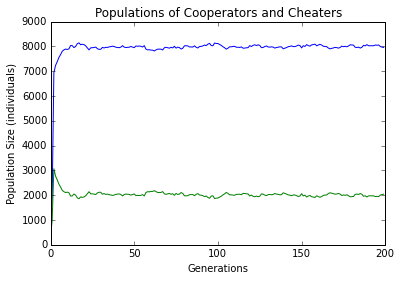

In [4]:
data=[[],[]] #places data into two categories, cooperators and cheaters

cooperators=list()
cheaters=list()


for i in range(100):
    cooperators.append(0)
for j in range(100):
    cheaters.append(1)
    
rhizobialPopulation= (cooperators + cheaters) 
random.shuffle(rhizobialPopulation)

for T in range(200): #loops through to generate new rhizobial pops based on nodule distribution
    nods=makeNodules(rhizobialPopulation)
    rhizobialPopulation=makeMicrobes(nods,8,2,5)
    rhizobialPopulation=limit(rhizobialPopulation,10000)
    for i in range(2):
        data[i].append(rhizobialPopulation.count(i)) #runs through T number of generations 
    

for i in range(2): #plots data 
    plot(data[i])
    title("Populations of Cooperators and Cheaters")
    xlabel("Generations")
    ylabel("Population Size (individuals)")


This code above represents a biologically inaccurate model of regenerated rhizobial populations. Here, the nodule number is dependent of the starting population composition and number as opposed to only the composition. The populations rapidly reach their equilibrium points and stabilize there due to the equal release of cooperators and cheaters from mixed nodules. 

The following cell shows a manipulation of the original model that begins to represent the fact that not all microbes will form nodules. By introducing random numbers and rejection rates for each of the nodule types I am able to indirectly control the rate at which nodules are formed. Below, the graph shows what happens when mixed nodules and cheaters are rejected at a higher rate than standard cooperating nodules. 

1000
0


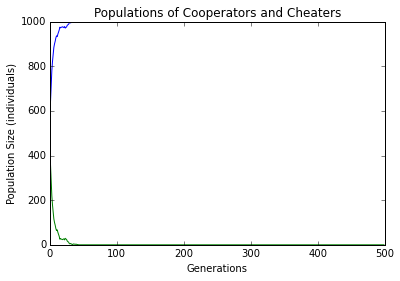

In [5]:
popSize=1000 #limits overall population size and provides basis for code

def makeNodules(popMicrobe,rejectionRateA,rejectionRateB,rejectionRateC): #generates nodules based on rhizobial population
    nodules=list()
    n=0
    while ((n<(len(popMicrobe)-6))): #allows list to run smoothly by preventing access to nonexistant index values
        if ((popMicrobe[n])+(popMicrobe[n+1]))==0:
            if random.uniform(0.0,1.0)>rejectionRateA:
                nodules.append("a") 
                popMicrobe.pop(n)
                popMicrobe.pop(n)
            else:
                n=n+2
        if ((popMicrobe[n])+(popMicrobe[n+1]))==2:
            if random.uniform(0.0,1.0)>rejectionRateB:
                nodules.append("b")
                popMicrobe.pop(n)
                popMicrobe.pop(n)
            else:
                n=n+2  
        if ((popMicrobe[n])+(popMicrobe[n+1]))==1:
            if random.uniform(0.0,1.0)>rejectionRateC:
                nodules.append("c")
                popMicrobe.pop(n)
                popMicrobe.pop(n)
            else:
                n=n+2
  
    return nodules,popMicrobe

def makeMicrobes(nodules, coR, chR, mxR): #repopulates soil from senesced nodules
    a=0
    releasedRhizobia=list()
    while(a<len(nodules)):
        if nodules[a]=="a":
            for i in range(coR):
                releasedRhizobia.append(0)
        if nodules[a]=="b":
            for j in range(chR):
                releasedRhizobia.append(1)
        if nodules[a]=="c":
                for k in range(mxR):
                    releasedRhizobia.append(0)
                    releasedRhizobia.append(1)
        a=a+1
    return releasedRhizobia

def limit(microbialList,popSizeLimit): #cuts list down to consistent size. Prevents expo growth
    newPop=(microbialList+rhizobialPopulation)
    random.shuffle(newPop)
    if len(newPop)>popSizeLimit:
        newPop=newPop[:-(len(newPop)-(popSizeLimit))]
    return newPop

data=[[],[]] #places data into two categories, cooperators and cheaters

cooperators=list()
cheaters=list()


for i in range(int(popSize/2)): #ensures item is an integer
    cooperators.append(0)
for j in range(int(popSize/2)):
    cheaters.append(1)
    
rhizobialPopulation= (cooperators + cheaters) 
random.shuffle(rhizobialPopulation)


for T in range(500):
    nods,leftovers=makeNodules(rhizobialPopulation,0.1,0.8,0.5) #accounts for remaining population
    #print (len(rhizobialPopulation))
    rhizobialPopulation=makeMicrobes(nods,6,3,4)+(leftovers)
    rhizobialPopulation=limit(rhizobialPopulation,popSize)
    for i in range(2):
        data[i].append(rhizobialPopulation.count(i)) #runs through T number of generations 
        
for i in range(2): #plots data 
    print (data[i][len(data[i])-1]) #prints end values for both 
    plot (data[i])
    title("Populations of Cooperators and Cheaters")
    xlabel("Generations")
    ylabel("Population Size (individuals)")



Here, the model has been modified to restrict the total number of nodules that are allowed to form. THis allows for the populations to reach extreme dynamics rapidly. 


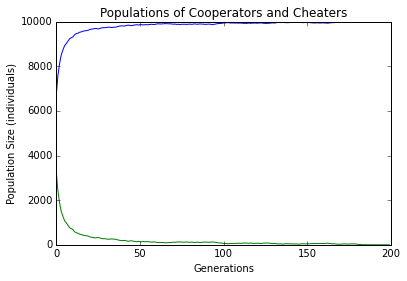

In [6]:
def makeNodules(popMicrobe): #generates nodules based on rhizobial population
    nodules=list()
    n=0
    m=1
    while (n<(len(popMicrobe)-1) and (m<(len(popMicrobe)-1))): #runs through for the len of pop
        if ((popMicrobe[n])+(popMicrobe[m]))==0:
            nodules.append(['a'])
        if ((popMicrobe[n])+(popMicrobe[m]))==2:
            nodules.append(['b'])
        if ((popMicrobe[n])+(popMicrobe[m]))==1:
            nodules.append(['c'])
        if ((popMicrobe[n])+(popMicrobe[m]))==1: #forms "second type" of mixed nod for manipulation later 
            nodules.append(['d'])
        n=n+2
        m=m+2
    return nodules 

def makeMicrobes(nodules, coR, chR, mxCR, mxXR): #repopulates soil from senesced nodules
    a=0
    releasedRhizobia=list()
    while(a<len(nodules)):
        if nodules[a]==["a"]:
            for i in range(coR):
                releasedRhizobia.append(0)
        if nodules[a]==["b"]:
            for j in range(chR):
                releasedRhizobia.append(1)
        if nodules[a]==["c"]:
            for k in range(mxCR):
                #separate the release rates of coops and cheaters from mixed nodules 
                releasedRhizobia.append(0)
        if nodules[a]==["d"]:
            for l in range(mxXR):
                releasedRhizobia.append(1)
                    
        a=a+1
    return releasedRhizobia

def limit(microbialList,popSizeLimit): #cuts list down to consistent size. Prevents expo growth
    random.shuffle(microbialList)
    if len(microbialList)>popSizeLimit:
        microbialList=microbialList[:-(len(microbialList)-(popSizeLimit))]
    return microbialList

data=[[],[]] #places data into two categories, cooperators and cheaters

cooperators=list()
cheaters=list()


for i in range(5000):
    cooperators.append(0)
for j in range(5000):
    cheaters.append(1)
    
rhizobialPopulation= (cooperators + cheaters) 
random.shuffle(rhizobialPopulation)

for T in range(200):
    nods=makeNodules(rhizobialPopulation)
    rhizobialPopulation=makeMicrobes(nods,8,2,6,4)
    rhizobialPopulation=limit(rhizobialPopulation,10000)
    for i in range(2):
        data[i].append(rhizobialPopulation.count(i)) #runs through T number of generations 
    
#print (popTrim.count(0))
#print (popTrim.count(1))
for i in range(2): #plots data 
    plot (data[i])
    title("Populations of Cooperators and Cheaters")
    xlabel("Generations")
    ylabel("Population Size (individuals)")


This version has been updated to allow different release rates out of the mixed nodules post nodule senesence. It appears to be the case that plants being able to differentially recognize the rhizobia within a given nodule would likely rapidly drive the cheater population extinct. 

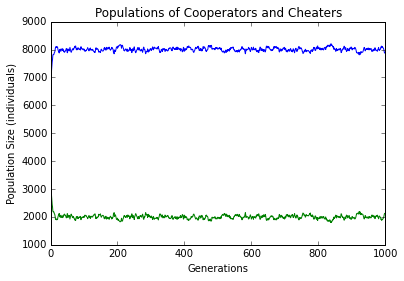

In [8]:
data=[[],[]] #places data into two categories, cooperators and cheaters

cooperators=list()
cheaters=list()


for i in range(5000):
    cooperators.append(0)
for j in range(5000):
    cheaters.append(1)
    
rhizobialPopulation= (cooperators + cheaters) 
random.shuffle(rhizobialPopulation)

def makeNodules(popMicrobe): #generates nodules based on rhizobial population
    nodules=list()
    n=0
    m=1
    while (n<(len(popMicrobe)-1) and (m<(len(popMicrobe)-1))): #runs through for the len of pop
        if ((popMicrobe[n])+(popMicrobe[m]))==0:
            nodules.append("a")
        if ((popMicrobe[n])+(popMicrobe[m]))==2:
            nodules.append("b")
        if ((popMicrobe[n])+(popMicrobe[m]))==1:
            nodules.append("c")
        n=n+2
        m=m+2
    return nodules 

def immuneResponse(microbeNods, deathRate): #potential effects of overpopulation of cheaters
    response=list()
    b=0
    if (microbeNods.count("a")<microbeNods.count("b")) or (microbeNods.count("a")<(microbeNods.count("c"))):
        #microbeNods=microbeNods[:-(len(microbeNods)-(deathRate*(len(microbeNods))))]
        #microbeNods=(microbeNods, maxlen=((len(microbeNods))*(deathRate)))
        if (len(microbeNods))>int((len(microbeNods)*deathRate)):
            microbeNods=microbeNods[:-((len(microbeNods))-int(deathRate*(len(microbeNods))))]
    return microbeNods
        

def makeMicrobes(nodules, coR, chR, mxR): #repopulates soil from senesced nodules
    a=0
    releasedRhizobia=list()
    while(a<len(nodules)):
        if nodules[a]=="a":
            for i in range(coR):
                releasedRhizobia.append(0)
        if nodules[a]=="b":
            for j in range(chR):
                releasedRhizobia.append(1)
        if nodules[a]=="c":
            for k in range(mxR):
                releasedRhizobia.append(0)
                releasedRhizobia.append(1)
        a=a+1
    return releasedRhizobia

def limit(microbialList,popSizeLimit): #cuts list down to consistent size. Prevents expo growth
    random.shuffle(microbialList)
    if len(microbialList)>popSizeLimit:
        microbialList=microbialList[:-(len(microbialList)-(popSizeLimit))]
    return microbialList


for T in range(1000):
    nods=makeNodules(rhizobialPopulation)
    cutNods=immuneResponse(nods,0.5) #models a mass immune response that doesn't discriminate between types, kills 50% of population when conditions met  
    rhizobialPopulation=makeMicrobes(cutNods,8,2,5)
    rhizobialPopulation=limit(rhizobialPopulation,10000)
    for i in range(2):
        data[i].append(rhizobialPopulation.count(i)) #runs through T number of generations 

for i in range(2): #plots data 
    plot(data[i])
    title("Populations of Cooperators and Cheaters")
    xlabel("Generations")
    ylabel("Population Size (individuals)")


This modification was made based on the widepsread immune response that may occur when overexposure to cheaters occurs. Ultimately the population dynamics appear to remain the same. 

# Conclusion/ future goals

This model sets a framework for future manipulation of the biological process known as "sanctioning." Here, it is shown the cheaters will exist at low populations in the microbial communities in soil surrounding root systems of plants even when "sanctioning" mechanisms are implemented against the cheaters. No "conclusions" can be made with any sort of confidence based on the current total number of experiments and nature of the model. 

For future use, this model will be improved by adding additional functions that allow parameter manipulation across the model through an additional experimental function. Furthermore, this would allow more efficient comparisons between experiments and between parameter manipulations within experiments. 